
## Project Context 
**Project Objective**:

The objective of this project is to develop a music recommendation system that predicts the perceived appreciation of music based on Twitter analyses and user feedback. This will involve leveraging contextual data from the nowplaying-RS dataset, which contains 11.6 million music listening events from 139K users and 346K tracks collected from Twitter. Additionally, sentiment values associated with hashtags will be analyzed to understand emotional context.

**Data Sources**:
- nowplaying-RS Dataset:

Contains rich context and content features of listening events, including timestamps, user location, tweet language, and sentiment analysis of hashtags.
Provides insights into user preferences and cultural origins based on listening behavior.

- Spotify Tracks Dataset:

Includes audio features and genre information for Spotify tracks, enabling genre-based analysis and recommendation system development.

## Project Scope:

**1. Data Exploration and Cleaning**:

- Understand the structure of the nowplaying-RS dataset.
- Address missing values, outliers, and inconsistencies in the data.
- Analyze sentiment values associated with hashtags to extract emotional context.

**2. Data Analysis and Visualization**:
- Perform exploratory data analysis (EDA) to uncover patterns and relationships within the datasets.
- Visualize data using graphs and charts to gain insights into user preferences and music trends.

**3. Feature Engineering and Modeling**:
- Extract relevant features from the datasets for building predictive models.
- Develop machine learning models to predict music appreciation based on user context and content features.

**4.  Final Report**:
- Compile final project report integrating previous renderings, including conclusions and future directions.
- Clean and comment code on GitHub, refine model and modeling pipeline if time permits.

### 1. Data Exploration and cleaning

In the first step of this project to gain a comprehensive understanding of the datasets, I will examine the following tables to describe their structures.

The **"sentiment_values.csv"** dataset provides sentiment analysis results for hashtags encountered in the listening events. It includes sentiment scores from various lexicons (Vader, AFINN, Opinion Lexicon, SentiStrength) such as minimum, maximum, sum, and average scores. The hashtag column links sentiment scores to specific hashtags associated with the listening events:


| Name of the Column | Variable's Type | Description                                       | Categorical / Quantitative |
|--------------------|-----------------|---------------------------------------------------|----------------------------|
| hashtag            | Float          | Hashtag associated with the sentiment information  | Quantitative                       |
| vader_min          | Float           | Minimum sentiment score using Vader lexicon       | Quantitative               |
| vader_max          | Float           | Maximum sentiment score using Vader lexicon       | Quantitative               |
| vader_sum          | Float           | Sum of sentiment scores using Vader lexicon       | Quantitative               |
| vader_avg          | Float           | Average sentiment score using Vader lexicon       | Quantitative               |
| afinn_min          | Float           | Minimum sentiment score using AFINN lexicon       | Quantitative               |
| afinn_max          | Float           | Maximum sentiment score using AFINN lexicon       | Quantitative               |
| afinn_sum          | Float           | Sum of sentiment scores using AFINN lexicon       | Quantitative               |
| afinn_avg          | Float           | Average sentiment score using AFINN lexicon       | Quantitative               |
| ol_min             | Float           | Minimum sentiment score using Opinion Lexicon     | Quantitative               |
| ol_max             | Float           | Maximum sentiment score using Opinion Lexicon     | Quantitative               |
| ol_sum             | Float           | Sum of sentiment scores using Opinion Lexicon     | Quantitative               |
| ol_avg             | Float           | Average sentiment score using Opinion Lexicon     | Quantitative               |
| ss_min             | Float           | Minimum sentiment score using SentiStrength Lexicon| Quantitative               |
| ss_max             | Float           | Maximum sentiment score using SentiStrength Lexicon| Quantitative               |
| ss_sum             | Float           | Sum of sentiment scores using SentiStrength Lexicon| Quantitative               |
| ss_avg             | Float           | Average sentiment score using SentiStrength Lexicon| Quantitative               |

The **"user_track_hashtag_timestamp.csv"** dataset captures associations between users, tracks, hashtags, and timestamps of listening events. Key columns include user_id, track_id, hashtag, and created_at. This dataset enables us to explore user engagement and interactions with music content through hashtags on social media:

| Name of the Column | Variable's Type | Description                                       | Categorical / Quantitative |
|--------------------|-----------------|---------------------------------------------------|----------------------------|
| user_id            | Object          | Identifier for the user                            | N/A                        |
| track_id           | Object          | Identifier for the track                           | N/A                        |
| hashtag            | Object          | Hashtag associated with the listening event        | Categorical                        |
| created_at         | Object          | Timestamp of the listening event                   | N/A                        |

The **"context_content_features.csv"** dataset contains contextual and content features related to music listening events collected from Twitter. It includes information such as coordinates, instrumentalness, liveness, speechiness, danceability, valence, loudness, tempo, acousticness, energy, mode, key, artist_id, place, geo, tweet_lang, track_id, created_at, lang, and time_zone. These variables encompass a range of audio features and contextual information associated with each listening event:


| Name of the Column | Variable's Type | Description                                       | Categorical / Quantitative |
|--------------------|-----------------|---------------------------------------------------|----------------------------|
| id                 | Object          | Unique identifier for the listening event          | N/A                        |
| user_id            | Object          | Identifier for the user                            | N/A                        |
| track_id           | Object          | Identifier for the track being listened to         | N/A                        |
| artist_id          | Object          | Identifier for the artist of the track             | N/A                        |
| instrumentalness   | Float           | Measure of instrumentalness of the track           | Quantitative               |
| liveness           | Float           | Measure of liveness of the track                   | Quantitative               |
| speechiness        | Float           | Measure of speechiness in the track                | Quantitative               |
| danceability       | Float           | Measure of danceability of the track               | Quantitative               |
| valence            | Float           | Measure of musical positiveness conveyed by track  | Quantitative               |
| loudness           | Float           | Overall loudness of the track in decibels           | Quantitative               |
| tempo              | Float           | Estimated tempo of the track in beats per minute    | Quantitative               |
| acousticness       | Float           | Measure of acousticness of the track               | Quantitative               |
| energy             | Float           | Measure of energy of the track                     | Quantitative               |
| mode               | Integer         | Mode of the track (major or minor)                 | Categorical                |
| key                | Integer         | Key the track is in (mapped to pitches)            | Categorical                |
| coordinates        | Object          | Coordinates associated with the listening event    | N/A                        |
| place              | Object          | Place associated with the listening event           | N/A                        |
| geo                | Object          | Geo information associated with the listening event | N/A                        |
| tweet_lang         | Object          | Language of the tweet                              | Categorical                |
| created_at         | Object          | Timestamp of the listening event                   | N/A                        |
| lang               | Object          | Language associated with the event                  | Categorical                |
| time_zone          | Object          | Time zone of the user                              | Categorical                |


In [2]:
# Here I load all the necessary packages

import numpy as np 
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# To avoid warning messages
import warnings
warnings.filterwarnings('ignore')

In [82]:
# Load the dataset
sentiment_df  = pd.read_csv('D:\Datasciencetest\My_project\sentiment_values.csv')

sentiment_df.head()


,,,,hashtag,vader_min,vader_max,vader_sum,vader_avg,afinn_min,afinn_max,afinn_sum,afinn_avg,ol_min,ol_max,ol_sum,ol_avg,ss_min,ss_max,ss_sum,ss_avg
relaxtime,0.8,0.8,2.4,0.8,NaN,NaN,NaN,NaN,0.7375,0.7375,0.7375,0.7375,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
melovechilicheese,0.8,0.8,0.8,0.8,NaN,NaN,NaN,NaN,0.9000,0.9000,0.9000,0.9000,1.0,1.0,1.0,1.0,0.8,0.8,0.8,0.8
greatmusic,0.8,0.8,2.4,0.8,1.0,1.0,1.0,1.0,0.8875,0.8875,0.8875,0.8875,1.0,1.0,1.0,1.0,0.8,0.8,0.8,0.8
rockballad,0.7,0.7,0.7,0.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
amonamarth,0.3,0.3,0.3,0.3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN


I start with cleaning the dataset "sentiment_values.csv". As can be seen, the hashtag column is misplaced and it should be in the first column, then we have 4 columns that are not explicitly specified. I rename them to the sentiment scores. This renaming step enhances the interpretability of the dataset, providing clearer and more meaningful column names that align with the specific sentiment analysis metrics used.


Furthermore, the columns 'vader_min', 'vader_max', 'vader_sum', 'afinn_min', 'afinn_max', 'afinn_sum', 'ol_min', 'ol_max', 'ol_sum', 'ss_min', 'ss_max', and 'ss_sum' should be dropped because they do not provide valuable information for the analysis and modeling process. These columns represent minimum, maximum, and sum values for sentiment scores ('vader', 'afinn', 'ol', and 'ss'), but since their individual values are already available in separate columns ('vader_score', 'afinn_score', 'ol_score', and 'ss_score'), including them would introduce redundancy and increase the complexity of the dataset without adding meaningful insights. Therefore, removing these redundant columns helps streamline the dataset and focus on the relevant sentiment score metrics for further analysis.

In [83]:
# Rename the 'hashtag' column to 'ss_score'
sentiment_df.rename(columns={'hashtag': 'ss_score'}, inplace=True)

# Reset the index
sentiment_df.reset_index(inplace=True)

# Rename columns for clarity
sentiment_df.rename(columns={'level_0': 'hashtag', 'level_1': 'vader_score', 'level_2': 'afinn_score', 'level_3': 'ol_score'}, inplace=True)


In [84]:
# Strip leading and trailing spaces from column names
sentiment_df.columns = sentiment_df.columns.str.strip()

# Drop unnecessary score columns
columns_to_drop = ['vader_min', 'vader_max', 'vader_sum', 'afinn_min', 'afinn_max', 'afinn_sum', 'ol_min', 'ol_max', 'ol_sum', 'ss_min', 'ss_max', 'ss_sum']

sentiment_df.drop(columns_to_drop, axis=1, inplace=True)

# Display the modified dataset
sentiment_df.head()



,hashtag,vader_score,afinn_score,ol_score,ss_score,vader_avg,afinn_avg,ol_avg,ss_avg
0,relaxtime,0.8,0.8,2.4,0.8,NaN,0.7375,NaN,NaN
1,melovechilicheese,0.8,0.8,0.8,0.8,NaN,0.9000,1.0,0.8
2,greatmusic,0.8,0.8,2.4,0.8,1.0,0.8875,1.0,0.8
3,rockballad,0.7,0.7,0.7,0.7,NaN,NaN,NaN,NaN
4,amonamarth,0.3,0.3,0.3,0.3,NaN,NaN,0.0,NaN


In [85]:
# Display basic information about the dataset

display(sentiment_df.info())  # Summary of columns and data types
display(sentiment_df.describe())  # Summary statistics for numerical columns

# Check for missing values
missing_values = sentiment_df.isnull().sum()
print("Missing Values:\n", missing_values)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5290 entries, 0 to 5289
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   hashtag      5290 non-null   object 
 1   vader_score  3867 non-null   float64
 2   afinn_score  3867 non-null   float64
 3   ol_score     3867 non-null   float64
 4   ss_score     3867 non-null   float64
 5   vader_avg    255 non-null    float64
 6   afinn_avg    2635 non-null   float64
 7   ol_avg       2823 non-null   float64
 8   ss_avg       2160 non-null   float64
dtypes: float64(8), object(1)
memory usage: 372.1+ KB


None

,vader_score,afinn_score,ol_score,ss_score,vader_avg,afinn_avg,ol_avg,ss_avg
count,3867.000000,3867.000000,3867.000000,3867.000000,255.000000,2635.000000,2823.000000,2160.000000
mean,0.495035,0.513007,0.921877,0.503563,0.749020,0.534016,0.471248,0.527677
std,0.239754,0.239695,0.629695,0.236347,0.432158,0.256876,0.489264,0.234509
min,0.100000,0.100000,0.100000,0.100000,0.000000,0.037500,0.000000,0.000000
25%,0.300000,0.300000,0.600000,0.300000,0.500000,0.300000,0.000000,0.300000
50%,0.400000,0.600000,0.700000,0.600000,1.000000,0.612500,0.000000,0.600000
75%,0.700000,0.700000,1.400000,0.700000,1.000000,0.737500,1.000000,0.700000
max,1.000000,1.000000,4.800000,1.000000,1.000000,0.900000,1.000000,1.000000


Missing Values:
 hashtag           0
vader_score    1423
afinn_score    1423
ol_score       1423
ss_score       1423
vader_avg      5035
afinn_avg      2655
ol_avg         2467
ss_avg         3130
dtype: int64


In [22]:
sentiment_df.head()

,hashtag,vader_score,afinn_score,ol_score,ss_score,vader_avg,afinn_avg,ol_avg,ss_avg
0,relaxtime,0.8,0.8,2.4,0.8,NaN,0.7375,NaN,NaN
1,melovechilicheese,0.8,0.8,0.8,0.8,NaN,0.9000,1.0,0.8
2,greatmusic,0.8,0.8,2.4,0.8,1.0,0.8875,1.0,0.8
3,rockballad,0.7,0.7,0.7,0.7,NaN,NaN,NaN,NaN
4,amonamarth,0.3,0.3,0.3,0.3,NaN,NaN,0.0,NaN


In the subsequent step, we address missing values within the sentiment scores (vader_score, afinn_score, ol_score, ss_score) by imputing them with average values where available. This approach ensures that our data remains representative and complete. The remaining unnecessary score columns (vader_avg, afinn_avg, ol_avg, ss_avg) are then dropped, as they do not offer additional valuable information for our analysis. Additionally, any rows containing missing values are dropped entirely to maintain data integrity and consistency.

In [86]:
# Fill missing 'vader_score' with 'vader_avg' where available
sentiment_df['vader_score'] = sentiment_df.apply(lambda row: row['vader_avg'] if np.isnan(row['vader_score']) else row['vader_score'], axis=1)

# Fill missing 'afinn_score' with 'afinn_avg' where available
sentiment_df['afinn_score'] = sentiment_df.apply(lambda row: row['afinn_avg'] if np.isnan(row['afinn_score']) else row['afinn_score'], axis=1)

# Fill missing 'ol_score' with 'ol_avg' where available
sentiment_df['ol_score'] = sentiment_df.apply(lambda row: row['ol_avg'] if np.isnan(row['ol_score']) else row['ol_score'], axis=1)

# Fill missing 'ss_score' with 'ss_avg' where available
sentiment_df['ss_score'] = sentiment_df.apply(lambda row: row['ss_avg'] if np.isnan(row['ss_score']) else row['ss_score'], axis=1)

# Drop remaining unnecessary score columns
sentiment_df.drop(['vader_avg', 'afinn_avg', 'ol_avg', 'ss_avg'], axis=1, inplace=True)

# Drop rows with any missing values
sentiment_df.dropna(axis=0, how='any', inplace=True)

# Display the modified dataset after handling missing values
sentiment_df.head()


,hashtag,vader_score,afinn_score,ol_score,ss_score
0,relaxtime,0.8,0.8,2.4,0.8
1,melovechilicheese,0.8,0.8,0.8,0.8
2,greatmusic,0.8,0.8,2.4,0.8
3,rockballad,0.7,0.7,0.7,0.7
4,amonamarth,0.3,0.3,0.3,0.3


In [7]:
sentiment_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3868 entries, 0 to 5287
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   hashtag      3868 non-null   object 
 1   vader_score  3868 non-null   float64
 2   afinn_score  3868 non-null   float64
 3   ol_score     3868 non-null   float64
 4   ss_score     3868 non-null   float64
dtypes: float64(4), object(1)
memory usage: 181.3+ KB


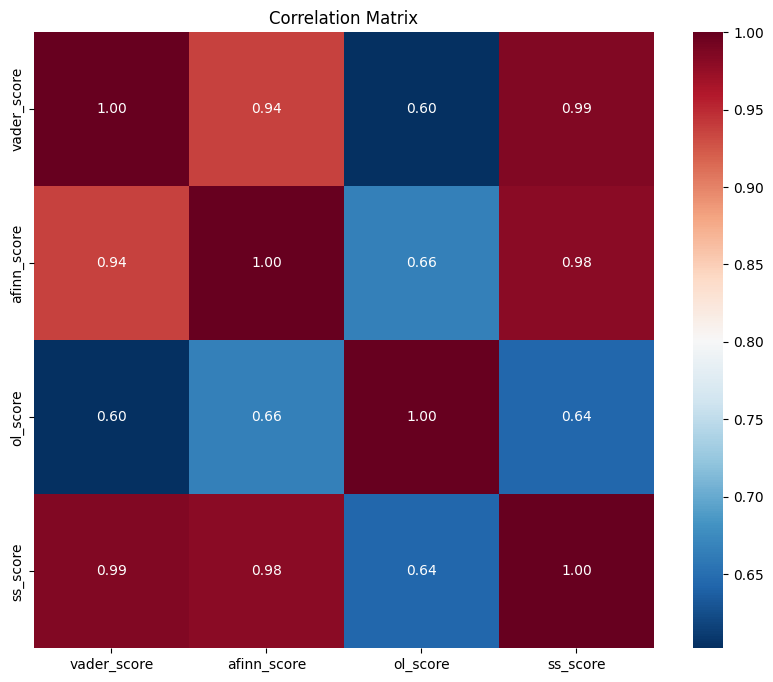

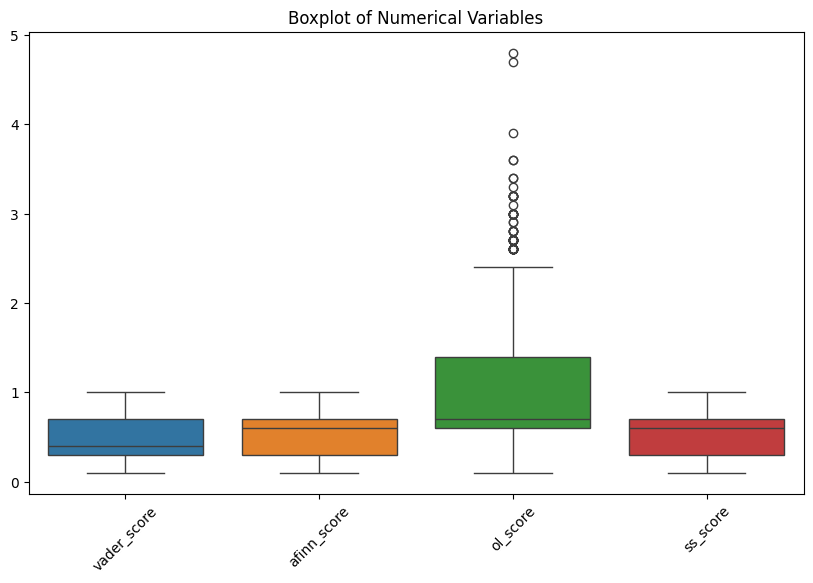

In [87]:
# Calculate correlation matrix
correlation_matrix = sentiment_df.corr()

# Plot heatmap of correlations
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='RdBu_r', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

# Detect outliers using box plots
plt.figure(figsize=(10, 6))
sns.boxplot(data=sentiment_df)
plt.title('Boxplot of Numerical Variables')
plt.xticks(rotation=45)
plt.show()

Upon visualizing the data using a heatmap and correlation matrix, we observed strong correlations among certain sentiment scores ('vader_score', 'afinn_score', 'ss_score'), with correlation coefficients exceeding 80%. This high correlation indicated redundancy in the information captured by these scores. To address this, we made the decision to drop these three highly correlated scores, retaining only the 'ol_score', which we then renamed to 'sentiment_score' for clarity and focus.

By executing these data preprocessing steps, we ensured that our dataset was cleaned, consolidated, and optimized for further analysis, with a specific emphasis on retaining meaningful sentiment information while eliminating redundancy.

In [88]:
# Drop remaining unnecessary score columns
sentiment_df.drop(['vader_score', 'afinn_score', 'ss_score'], axis=1, inplace=True)

# Rename 'ol_score' to 'sentiment_score'
sentiment_df.rename(columns={'ol_score': 'sentiment_score'}, inplace=True)

# Display the modified dataset with renamed column
display(sentiment_df.head())



,hashtag,sentiment_score
0,relaxtime,2.4
1,melovechilicheese,0.8
2,greatmusic,2.4
3,rockballad,0.7
4,amonamarth,0.3


In [10]:

# Identifying outliers in sentiment scores using the IQR
Q1 = sentiment_df['sentiment_score'].quantile(0.25)
Q3 = sentiment_df['sentiment_score'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

#Removing the outliers
sentiment_df = sentiment_df[(sentiment_df['sentiment_score'] >= lower_bound) & (sentiment_df['sentiment_score'] <= upper_bound)]


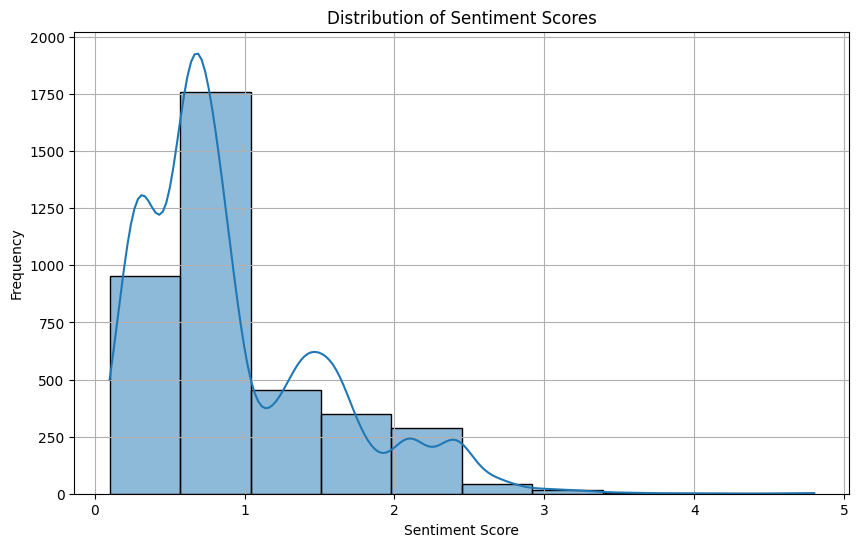

Top 10 hashtags with the largest sentiment_score:
                    hashtag  sentiment_score
4889               thriller              4.8
1287          harmonicalove              4.7
4174                   well              3.9
4458            richardmarx              3.6
4924               richmond              3.6
471              loversrock              3.4
630              cozypowell              3.4
4173        impressionnance              3.3
280           preciousgrace              3.2
1514  greatsongforagreatday              3.2
Sentiment score counts:
                 hashtag
sentiment_score         
0.1                   42
0.2                  197
0.3                  520
0.4                  191
0.5                    5
0.6                  515
0.6                  106
0.7                  481
0.8                  313
0.9                  287
0.9                   17
0.9                    3
1.0                   35
1.1                   24
1.2                  110
1.2   

In [89]:
# Plotting the distribution of sentiment scores
plt.figure(figsize=(10, 6))
sns.histplot(sentiment_df['sentiment_score'], bins=10, kde=True)
plt.title('Distribution of Sentiment Scores')
plt.xlabel('Sentiment Score')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# Show top 10 hashtags with the largest sentiment_score
top_10_hashtags = sentiment_df.nlargest(10, 'sentiment_score')
print("Top 10 hashtags with the largest sentiment_score:")
print(top_10_hashtags)

# Display the count of sentiment scores
sentiment_score_counts = sentiment_df.groupby(['sentiment_score']).count()
print("Sentiment score counts:")
print(sentiment_score_counts)

Here, we detail the preprocessing steps applied to the "user_track_hashtag_timestamp.csv" dataset. This preprocessing aims to ensure data cleanliness, integrity, and relevance for subsequent analyses.

In [90]:
# Load the second dataset
df2 = pd.read_csv('D:\\Datasciencetest\\My_project\\user_track_hashtag_timestamp.csv')
df2.head()

,user_id,track_id,hashtag,created_at
0,81496937,cd52b3e5b51da29e5893dba82a418a4b,nowplaying,2014-01-01 05:54:21
1,81496937,cd52b3e5b51da29e5893dba82a418a4b,goth,2014-01-01 05:54:21
2,81496937,cd52b3e5b51da29e5893dba82a418a4b,deathrock,2014-01-01 05:54:21
3,81496937,cd52b3e5b51da29e5893dba82a418a4b,postpunk,2014-01-01 05:54:21
4,2205686924,da3110a77b724072b08f231c9d6f7534,NowPlaying,2014-01-01 05:54:22


In [91]:
print(df2.shape)

# Count missing values for each column
missing_counts = df2.isna().sum()
print('missing_values: ', missing_counts)

(17560113, 4)
missing_values:  user_id       0
track_id      0
hashtag       1
created_at    0
dtype: int64


In [92]:
#dropping rows with null values in the 'hashtag' column
df2.dropna(subset=['hashtag'], inplace=True)

In [93]:
# Get the count of track_id occurrences
counts = df2['track_id'].value_counts()

# Remove tracks played less than 50 times
df2 = df2[~df2['track_id'].isin(counts[counts < 50].index)]

Here, tracks that have been played less than 50 times are filtered out. This ensures that only tracks with a significant number of plays are retained for further analysis, reducing noise and focusing on more popular tracks.

In [94]:
df_sentiment_1 = pd.merge(sentiment_df, df2, on="hashtag", how='inner')

This step merges the cleaned sentiment_df dataset with the filtered df2 dataset based on the common 'hashtag' column. The merge is performed using an inner join to retain only rows where hashtags exist in both datasets.

In [95]:
df_sentiment_1.head()

,hashtag,sentiment_score,user_id,track_id,created_at
0,relaxtime,2.4,104415394,9175ac1532ee7dbe97602866efabac58,2014-05-20 07:24:40
1,relaxtime,2.4,240771401,c2da30eb3450e8a3e5bfa16e8fa527da,2014-10-12 22:46:57
2,relaxtime,2.4,637256774,dcbb5aff8f96a79be9f59bc0e7b5c38d,2014-11-07 13:01:08
3,greatmusic,2.4,252330820,8f2ac86abb8bd48273c8fc95b632e347,2014-02-13 16:18:51
4,greatmusic,2.4,29235188,45bbd6d7cd65dc77596af8c5c0b89a70,2014-05-15 20:38:46


In [96]:
#Dropping duplicates
duplicates = df_sentiment_1.duplicated()
print(duplicates.sum())  # Returns the number of duplicate rows

#df_sentiment = df_sentiment.drop_duplicates(keep='first')


4763


In [98]:
print('dimensions of the merged dataframe: ', df_sentiment_1.shape)
df_sentiment_1.hashtag.value_counts().head(10)

dimensions of the merged dataframe:  (5038107, 5)


nowplaying         4870436
kiss92               56437
deathrock            24699
urbantraxxradio      23867
craveradio            9735
rock                  9483
stonerrock            4297
doommetal             4296
twittamp              2533
realclassicrock       2473
Name: hashtag, dtype: int64

we confirm the size of the merged dataset and also insights into the distribution of hashtags in the merged dataset by displaying the top 10 most frequently occurring hashtags.

In [99]:
df3 = pd.read_csv('D:\Datasciencetest\My_project\context_content_features.csv', usecols=range(0, 22))
df3.head()

,coordinates,instrumentalness,liveness,speechiness,danceability,valence,loudness,tempo,acousticness,energy,...,artist_id,place,geo,tweet_lang,track_id,created_at,lang,time_zone,user_id,id
0,NaN,0.004790,0.1800,0.0294,0.634,0.342,-8.345,125.044,0.00035,0.697,...,b2980c722a1ace7a30303718ce5491d8,NaN,NaN,en,cd52b3e5b51da29e5893dba82a418a4b,2014-01-01 05:54:21,en,Central Time (US & Canada),8.149694e+07,418243774842929150
1,NaN,0.017700,0.0638,0.0624,0.769,0.752,-8.252,95.862,0.26700,0.826,...,5cddcd0e314e2f2223ab21937d2c8778,NaN,NaN,en,da3110a77b724072b08f231c9d6f7534,2014-01-01 05:54:22,en,NaN,2.205687e+09,418243779137896450
2,NaN,0.000000,0.0860,0.0436,0.675,0.775,-4.432,97.030,0.21700,0.885,...,e41273f43af504714d85465294f1f369,NaN,NaN,en,ba84d88c10fb0e42d4754a27ead10546,2014-01-01 05:54:22,es,Mountain Time (US & Canada),1.325884e+08,418243779951198200
3,NaN,0.000000,0.1430,0.0292,0.324,0.333,-5.647,74.101,0.23900,0.574,...,557ce373bd29743eb00a3723ab19ebe8,NaN,NaN,en,33f95122281f76e7134f9cbea3be980f,2014-01-01 05:54:24,en,Eastern Time (US & Canada),9.767522e+07,418243788004687900
4,NaN,0.000183,0.3620,0.0524,0.767,0.808,-5.011,114.237,0.03640,0.739,...,77bd64b4bf77e10001fd02964985ae0f,NaN,NaN,en,b5c42e81e15cd54b9b0ee34711dedf05,2014-01-01 05:54:24,en,Central Time (US & Canada),1.794569e+07,418243789753700350


In [100]:
duplicates = df3.duplicated()
print(duplicates.sum())  # Returns the number of duplicate rows

61


In [24]:
# Get the count of the track_id
counts = df3['track_id'].value_counts()

# Select the items where the track_id count is less than 50 and remove them
df3 = df3[~df3['track_id'].isin(counts[counts < 50].index)]


Removing Tracks with Fewer Plays: Tracks that were played fewer than 50 times are removed. This filtering helps focus the analysis on more popular tracks, which are likely to provide more meaningful insights and trends. Additionally, removing infrequently played tracks can help reduce noise in the data.

In [25]:
df3.shape

(9143294, 22)

In [101]:
# Drop unnecessary columns before merging with df_sentiment dataframe
df3 = df3.drop(['coordinates', 'place', 'geo'], axis=1)
# Drop all null value rows
df3 = df3.dropna()

#Convert mode to Int64
df3['mode'] = df3['mode'].astype('Int64')

Dropping Unnecessary Columns & Removing Null Values: Unnecessary columns such as coordinates, id, place, and geo and also all null values are dropped. These columns do not provide valueable information and we use 'time_zone' instead 'coordinates', 'place' and 'geo' and 'user_id' instead 'id'

In [27]:
df3.shape

(6413576, 19)

In [102]:
# Limit dataset to only en (English) language
df3 = df3.loc[df3['lang'] == 'en']
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6257512 entries, 0 to 11614670
Data columns (total 19 columns):
 #   Column            Dtype  
---  ------            -----  
 0   instrumentalness  float64
 1   liveness          float64
 2   speechiness       float64
 3   danceability      float64
 4   valence           float64
 5   loudness          float64
 6   tempo             float64
 7   acousticness      float64
 8   energy            float64
 9   mode              Int64  
 10  key               float64
 11  artist_id         object 
 12  tweet_lang        object 
 13  track_id          object 
 14  created_at        object 
 15  lang              object 
 16  time_zone         object 
 17  user_id           float64
 18  id                int64  
dtypes: Int64(1), float64(11), int64(1), object(6)
memory usage: 960.8+ MB


In [29]:
df3.shape

(4916702, 19)

Filtering English Language Entries: The dataset is filtered to include only English language entries. This step ensures consistency in language for analysis and modeling purposes, as mixing multiple languages could introduce complexity and potentially skew results.

In [103]:
# Merge datasets based on track_id, created_at, and user_id
df4 = df_sentiment_1.merge(df3, on=['track_id', 'created_at', 'user_id'], how='inner')


Merging with Sentiment Data: The dataset is merged with df_sentiment based on specified columns (track_id, created_at, user_id). This merge combines sentiment information with the context content features, enriching the dataset with additional insights about user sentiment towards tracks.

In [104]:
duplicates = df_sentiment_1.duplicated()
print(duplicates.sum())  # Returns the number of duplicate rows

4763


In [105]:
duplicates = df3.duplicated()
print(duplicates.sum())  # Returns the number of duplicate rows

0


In [112]:
duplicates = df4.duplicated()
print(duplicates.sum())  # Returns the number of duplicate rows

0


In [111]:
#Drop duplicates
df4 = df4.drop_duplicates(keep='first')

In [66]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3033367 entries, 0 to 3033366
Data columns (total 21 columns):
 #   Column            Dtype  
---  ------            -----  
 0   hashtag           object 
 1   sentiment_score   float64
 2   user_id           int64  
 3   track_id          object 
 4   created_at        object 
 5   instrumentalness  float64
 6   liveness          float64
 7   speechiness       float64
 8   danceability      float64
 9   valence           float64
 10  loudness          float64
 11  tempo             float64
 12  acousticness      float64
 13  energy            float64
 14  mode              Int64  
 15  key               float64
 16  artist_id         object 
 17  tweet_lang        object 
 18  lang              object 
 19  time_zone         object 
 20  id                int64  
dtypes: Int64(1), float64(11), int64(2), object(7)
memory usage: 512.0+ MB


In [35]:
df4.head()

,hashtag,sentiment_score,user_id,track_id,created_at,instrumentalness,liveness,speechiness,danceability,valence,...,tempo,acousticness,energy,mode,key,artist_id,tweet_lang,lang,time_zone,id
0,greatmusic,2.4,252330820,8f2ac86abb8bd48273c8fc95b632e347,2014-02-13 16:18:51,0.00000,0.1980,0.1690,0.461,0.502,...,143.055,0.1000,0.628,0,4.0,1a17d5f8af99355edd8a92679a02cb0d,en,en,Eastern Time (US & Canada),433983615274610700
1,greatmusic,2.4,29235188,45bbd6d7cd65dc77596af8c5c0b89a70,2014-05-15 20:38:46,0.00001,0.0454,0.0451,0.677,0.886,...,77.837,0.0313,0.544,0,11.0,4a4e2ab094a4521b06252e9fdaf1fd0a,en,en,Eastern Time (US & Canada),467011221506781200
2,nowplaying,0.6,29235188,45bbd6d7cd65dc77596af8c5c0b89a70,2014-05-15 20:38:46,0.00001,0.0454,0.0451,0.677,0.886,...,77.837,0.0313,0.544,0,11.0,4a4e2ab094a4521b06252e9fdaf1fd0a,en,en,Eastern Time (US & Canada),467011221506781200
3,greatmusic,2.4,195485165,6d45097acaaf6ed5ee55041f53249fa0,2014-10-22 18:36:54,0.00000,0.0769,0.0427,0.591,0.422,...,100.063,0.0171,0.746,1,11.0,f78fb5a7ddce990521f685522f3f8fce,en,en,London,524962610295607300
4,rockballad,0.7,188975564,828640fcb17f9d85abb44db7f3160ebc,2014-05-17 06:27:35,0.00000,0.0845,0.0328,0.452,0.152,...,140.402,0.1790,0.490,1,3.0,a462c8874b0b12c7c598d2083e0f0c6c,en,en,Monterrey,467521790395555840


In [107]:
#Convert hashtag info string
df4['hashtag'] = df4['hashtag'].astype(str)

#Convert user_id info string
df4['user_id'] = df4['user_id'].astype(str)

#Show changes
df4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3228019 entries, 0 to 3228018
Data columns (total 21 columns):
 #   Column            Dtype  
---  ------            -----  
 0   hashtag           object 
 1   sentiment_score   float64
 2   user_id           object 
 3   track_id          object 
 4   created_at        object 
 5   instrumentalness  float64
 6   liveness          float64
 7   speechiness       float64
 8   danceability      float64
 9   valence           float64
 10  loudness          float64
 11  tempo             float64
 12  acousticness      float64
 13  energy            float64
 14  mode              Int64  
 15  key               float64
 16  artist_id         object 
 17  tweet_lang        object 
 18  lang              object 
 19  time_zone         object 
 20  id                int64  
dtypes: Int64(1), float64(11), int64(1), object(8)
memory usage: 544.9+ MB


In [123]:
# Use the median as the threshold
median_threshold = df4['sentiment_score'].median()

# Create new column `sentiment` based on `sentiment_score` values
df4['sentiment'] = np.where(df4['sentiment_score']>= median_threshold, 1, 0)


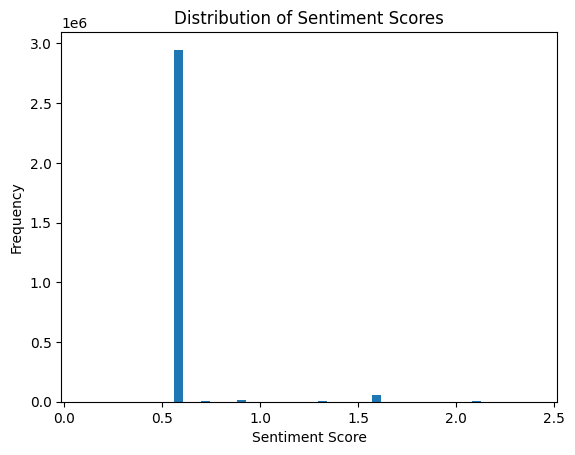

In [39]:
import matplotlib.pyplot as plt

plt.hist(df4['sentiment_score'], bins=50)
plt.xlabel('Sentiment Score')
plt.ylabel('Frequency')
plt.title('Distribution of Sentiment Scores')
plt.show()


Creating Binary Sentiment Column: A binary sentiment column is created based on the sentiment_score. This simplifies sentiment analysis by categorizing sentiment as either positive or negative, making it easier to interpret and incorporate into further analysis or modeling tasks.

In [124]:
df4['sentiment'].value_counts()

0    2333286
1      44992
Name: sentiment, dtype: int64

In [41]:
df4.head()

,hashtag,sentiment_score,user_id,track_id,created_at,instrumentalness,liveness,speechiness,danceability,valence,...,acousticness,energy,mode,key,artist_id,tweet_lang,lang,time_zone,id,sentiment
0,greatmusic,2.4,252330820,8f2ac86abb8bd48273c8fc95b632e347,2014-02-13 16:18:51,0.00000,0.1980,0.1690,0.461,0.502,...,0.1000,0.628,0,4.0,1a17d5f8af99355edd8a92679a02cb0d,en,en,Eastern Time (US & Canada),433983615274610700,1
1,greatmusic,2.4,29235188,45bbd6d7cd65dc77596af8c5c0b89a70,2014-05-15 20:38:46,0.00001,0.0454,0.0451,0.677,0.886,...,0.0313,0.544,0,11.0,4a4e2ab094a4521b06252e9fdaf1fd0a,en,en,Eastern Time (US & Canada),467011221506781200,1
2,nowplaying,0.6,29235188,45bbd6d7cd65dc77596af8c5c0b89a70,2014-05-15 20:38:46,0.00001,0.0454,0.0451,0.677,0.886,...,0.0313,0.544,0,11.0,4a4e2ab094a4521b06252e9fdaf1fd0a,en,en,Eastern Time (US & Canada),467011221506781200,1
3,greatmusic,2.4,195485165,6d45097acaaf6ed5ee55041f53249fa0,2014-10-22 18:36:54,0.00000,0.0769,0.0427,0.591,0.422,...,0.0171,0.746,1,11.0,f78fb5a7ddce990521f685522f3f8fce,en,en,London,524962610295607300,1
4,rockballad,0.7,188975564,828640fcb17f9d85abb44db7f3160ebc,2014-05-17 06:27:35,0.00000,0.0845,0.0328,0.452,0.152,...,0.1790,0.490,1,3.0,a462c8874b0b12c7c598d2083e0f0c6c,en,en,Monterrey,467521790395555840,1


In [115]:
# Drop remaining unnecessary columns
df4 = df4.drop(['hashtag', 'created_at', 'artist_id', 'tweet_lang', 'lang','id'], axis=1)

# Clean up and consolidate time_zone values
df4['time_zone'].replace({
    'Eastern Time (US & Canada)': 'Eastern_Time',
    'Central Time (US & Canada)': 'Central_Time',
    'Pacific Time (US & Canada)': 'Pacific_Time',
    'Mountain Time (US & Canada)': 'Mountain_Time',
    'Alaska': 'Alaska_Time',
    'Hawaii': 'Hawaii_Time',
    'Arizona': 'Mountain_Time',
    'America/Chicago': 'Central_Time',
    'America/New_York': 'Eastern_Time',
    'America/Los_Angeles': 'Pacific_Time',
    'America/Denver': 'Mountain_Time',
    'America/Detroit': 'Eastern_Time'
}, inplace=True)

# Filter dataset to USA time zones only
usa_timezones = ['Eastern_Time', 'Central_Time', 'Pacific_Time', 'Mountain_Time', 'Alaska_Time', 'Hawaii_Time']
df4 = df4.loc[df4['time_zone'].isin(usa_timezones)]

# Reorder and finalize columns for the MVP dataset
df_mvp = df4[['sentiment', 'sentiment_score', 'user_id', 'track_id', 'time_zone', 'instrumentalness', 'liveness',
              'speechiness', 'danceability', 'valence', 'loudness', 'tempo', 'acousticness', 'energy', 'mode', 'key']]

# One-hot encode the 'time_zone' column with prefix 'tz_' and drop the original 'time_zone' column
df_mvp = pd.get_dummies(df_mvp, columns=['time_zone'], prefix='tz', drop_first=False)

# Convert sentiment_score to int64
df_mvp['sentiment'] = df_mvp['sentiment'].astype('int64')

# Convert user_id to int64
df_mvp['user_id'] = df_mvp['user_id'].astype('int64')

# Convert the new dummy columns to int64
for col in df_mvp.columns:
    if col.startswith('tz_'):
        df_mvp[col] = df_mvp[col].astype('int64')

In [125]:
df_mvp.head()

,sentiment,sentiment_score,user_id,track_id,instrumentalness,liveness,speechiness,danceability,valence,loudness,...,acousticness,energy,mode,key,tz_Alaska_Time,tz_Central_Time,tz_Eastern_Time,tz_Hawaii_Time,tz_Mountain_Time,tz_Pacific_Time
0,1,2.4,252330820,8f2ac86abb8bd48273c8fc95b632e347,0.000000,0.1980,0.1690,0.461,0.502,-9.046,...,0.100000,0.628,0,4.0,0,0,1,0,0,0
1,1,2.4,29235188,45bbd6d7cd65dc77596af8c5c0b89a70,0.000010,0.0454,0.0451,0.677,0.886,-13.237,...,0.031300,0.544,0,11.0,0,0,1,0,0,0
2,1,0.6,29235188,45bbd6d7cd65dc77596af8c5c0b89a70,0.000010,0.0454,0.0451,0.677,0.886,-13.237,...,0.031300,0.544,0,11.0,0,0,1,0,0,0
6,0,0.3,124052165,d53b2de022666067050dae8f6645edc2,0.000142,0.1130,0.0709,0.355,0.118,-4.054,...,0.000004,0.980,0,7.0,1,0,0,0,0,0
7,1,0.6,62635490,2ac754eb153631a50e64b0b37801ef21,0.069000,0.3880,0.0390,0.697,0.630,-5.628,...,0.003310,0.917,1,1.0,0,0,1,0,0,0


In [3]:
df_mvp_1 = pd.read_csv('D:\Datasciencetest\My_project\module4_cleaned.csv')
df_mvp_1.head()

,sentiment,sentiment_score,user_id,track_id,instrumentalness,liveness,speechiness,danceability,valence,loudness,...,acousticness,energy,mode,key,tz_Alaska_Time,tz_Central_Time,tz_Eastern_Time,tz_Hawaii_Time,tz_Mountain_Time,tz_Pacific_Time
0,1,2.4,252330820,8f2ac86abb8bd48273c8fc95b632e347,0.000000,0.1980,0.1690,0.461,0.502,-9.046,...,0.100000,0.628,0,4.0,0,0,1,0,0,0
1,1,2.4,29235188,45bbd6d7cd65dc77596af8c5c0b89a70,0.000010,0.0454,0.0451,0.677,0.886,-13.237,...,0.031300,0.544,0,11.0,0,0,1,0,0,0
2,1,0.6,29235188,45bbd6d7cd65dc77596af8c5c0b89a70,0.000010,0.0454,0.0451,0.677,0.886,-13.237,...,0.031300,0.544,0,11.0,0,0,1,0,0,0
3,1,1.0,29235188,45bbd6d7cd65dc77596af8c5c0b89a70,0.000010,0.0454,0.0451,0.677,0.886,-13.237,...,0.031300,0.544,0,11.0,0,0,1,0,0,0
4,1,0.3,124052165,d53b2de022666067050dae8f6645edc2,0.000142,0.1130,0.0709,0.355,0.118,-4.054,...,0.000004,0.980,0,7.0,1,0,0,0,0,0


In [147]:
# Create a random sample of 10% of the rows
#sampled_df = df_mvp.sample(frac=0.2, random_state=42)
# Save the sampled data to a new CSV file
#sampled_df.to_csv('sampled_dataset.csv', index=False)


In [116]:
print(df_mvp.shape)
print(df_mvp_1.shape)

print(df_mvp.info())
print(df_mvp_1.info())

display(df_mvp.describe())

(2378278, 21)
(2267492, 21)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 2378278 entries, 0 to 3228018
Data columns (total 21 columns):
 #   Column            Dtype  
---  ------            -----  
 0   sentiment         int64  
 1   sentiment_score   float64
 2   user_id           int64  
 3   track_id          object 
 4   instrumentalness  float64
 5   liveness          float64
 6   speechiness       float64
 7   danceability      float64
 8   valence           float64
 9   loudness          float64
 10  tempo             float64
 11  acousticness      float64
 12  energy            float64
 13  mode              Int64  
 14  key               float64
 15  tz_Alaska_Time    int64  
 16  tz_Central_Time   int64  
 17  tz_Eastern_Time   int64  
 18  tz_Hawaii_Time    int64  
 19  tz_Mountain_Time  int64  
 20  tz_Pacific_Time   int64  
dtypes: Int64(1), float64(11), int64(8), object(1)
memory usage: 401.5+ MB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2267492 entries,

,sentiment,sentiment_score,user_id,instrumentalness,liveness,speechiness,danceability,valence,loudness,tempo,acousticness,energy,mode,key,tz_Alaska_Time,tz_Central_Time,tz_Eastern_Time,tz_Hawaii_Time,tz_Mountain_Time,tz_Pacific_Time
count,2.378278e+06,2.378278e+06,2.378278e+06,2.378278e+06,2.378278e+06,2.378278e+06,2.378278e+06,2.378278e+06,2.378278e+06,2.378278e+06,2.378278e+06,2.378278e+06,2378278.0,2.378278e+06,2.378278e+06,2.378278e+06,2.378278e+06,2.378278e+06,2.378278e+06,2.378278e+06
mean,9.992457e-01,6.097983e-01,4.852416e+08,1.072590e-01,1.864082e-01,5.953601e-02,5.576207e-01,5.170559e-01,-8.415097e+00,1.217477e+02,2.664883e-01,6.366571e-01,0.705944,5.310851e+00,9.296222e-03,2.503685e-01,4.618737e-01,2.341610e-03,3.900932e-02,2.371106e-01
std,2.745466e-02,8.188982e-02,6.462055e+08,2.571650e-01,1.562597e-01,6.047872e-02,1.561972e-01,2.516924e-01,4.286346e+00,2.841392e+01,3.014926e-01,2.302447e-01,0.455617,3.544559e+00,9.596773e-02,4.332254e-01,4.985444e-01,4.833351e-02,1.936172e-01,4.253108e-01
min,0.000000e+00,1.000000e-01,1.051600e+04,0.000000e+00,9.590000e-03,2.210000e-02,5.820000e-02,2.110000e-02,-4.978000e+01,3.541900e+01,0.000000e+00,2.600000e-05,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.000000e+00,6.000000e-01,1.942913e+07,0.000000e+00,9.340000e-02,3.210000e-02,4.600000e-01,3.160000e-01,-1.071000e+01,1.000020e+02,1.840000e-02,4.790000e-01,0.0,2.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,1.000000e+00,6.000000e-01,2.828276e+08,4.840000e-05,1.250000e-01,3.990000e-02,5.650000e-01,5.170000e-01,-7.375000e+00,1.200590e+02,1.300000e-01,6.800000e-01,1.0,5.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,1.000000e+00,6.000000e-01,6.346904e+08,9.750000e-03,2.350000e-01,5.840000e-02,6.690000e-01,7.260000e-01,-5.292000e+00,1.390160e+02,4.580000e-01,8.250000e-01,1.0,9.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
max,1.000000e+00,3.400000e+00,2.908643e+09,9.980000e-01,9.970000e-01,9.650000e-01,9.850000e-01,9.910000e-01,3.647000e+00,2.192970e+02,9.960000e-01,9.990000e-01,1.0,1.100000e+01,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00


In [3]:
# Value counts of sentiment
df_mvp_1['sentiment'].value_counts()

1    2260390
0       7102
Name: sentiment, dtype: int64

In [3]:
# Visualize sentiment distribution
sns.countplot(x='sentiment', data=df_mvp, palette='hls')
plt.show();


NameError: name 'df_mvp' is not defined

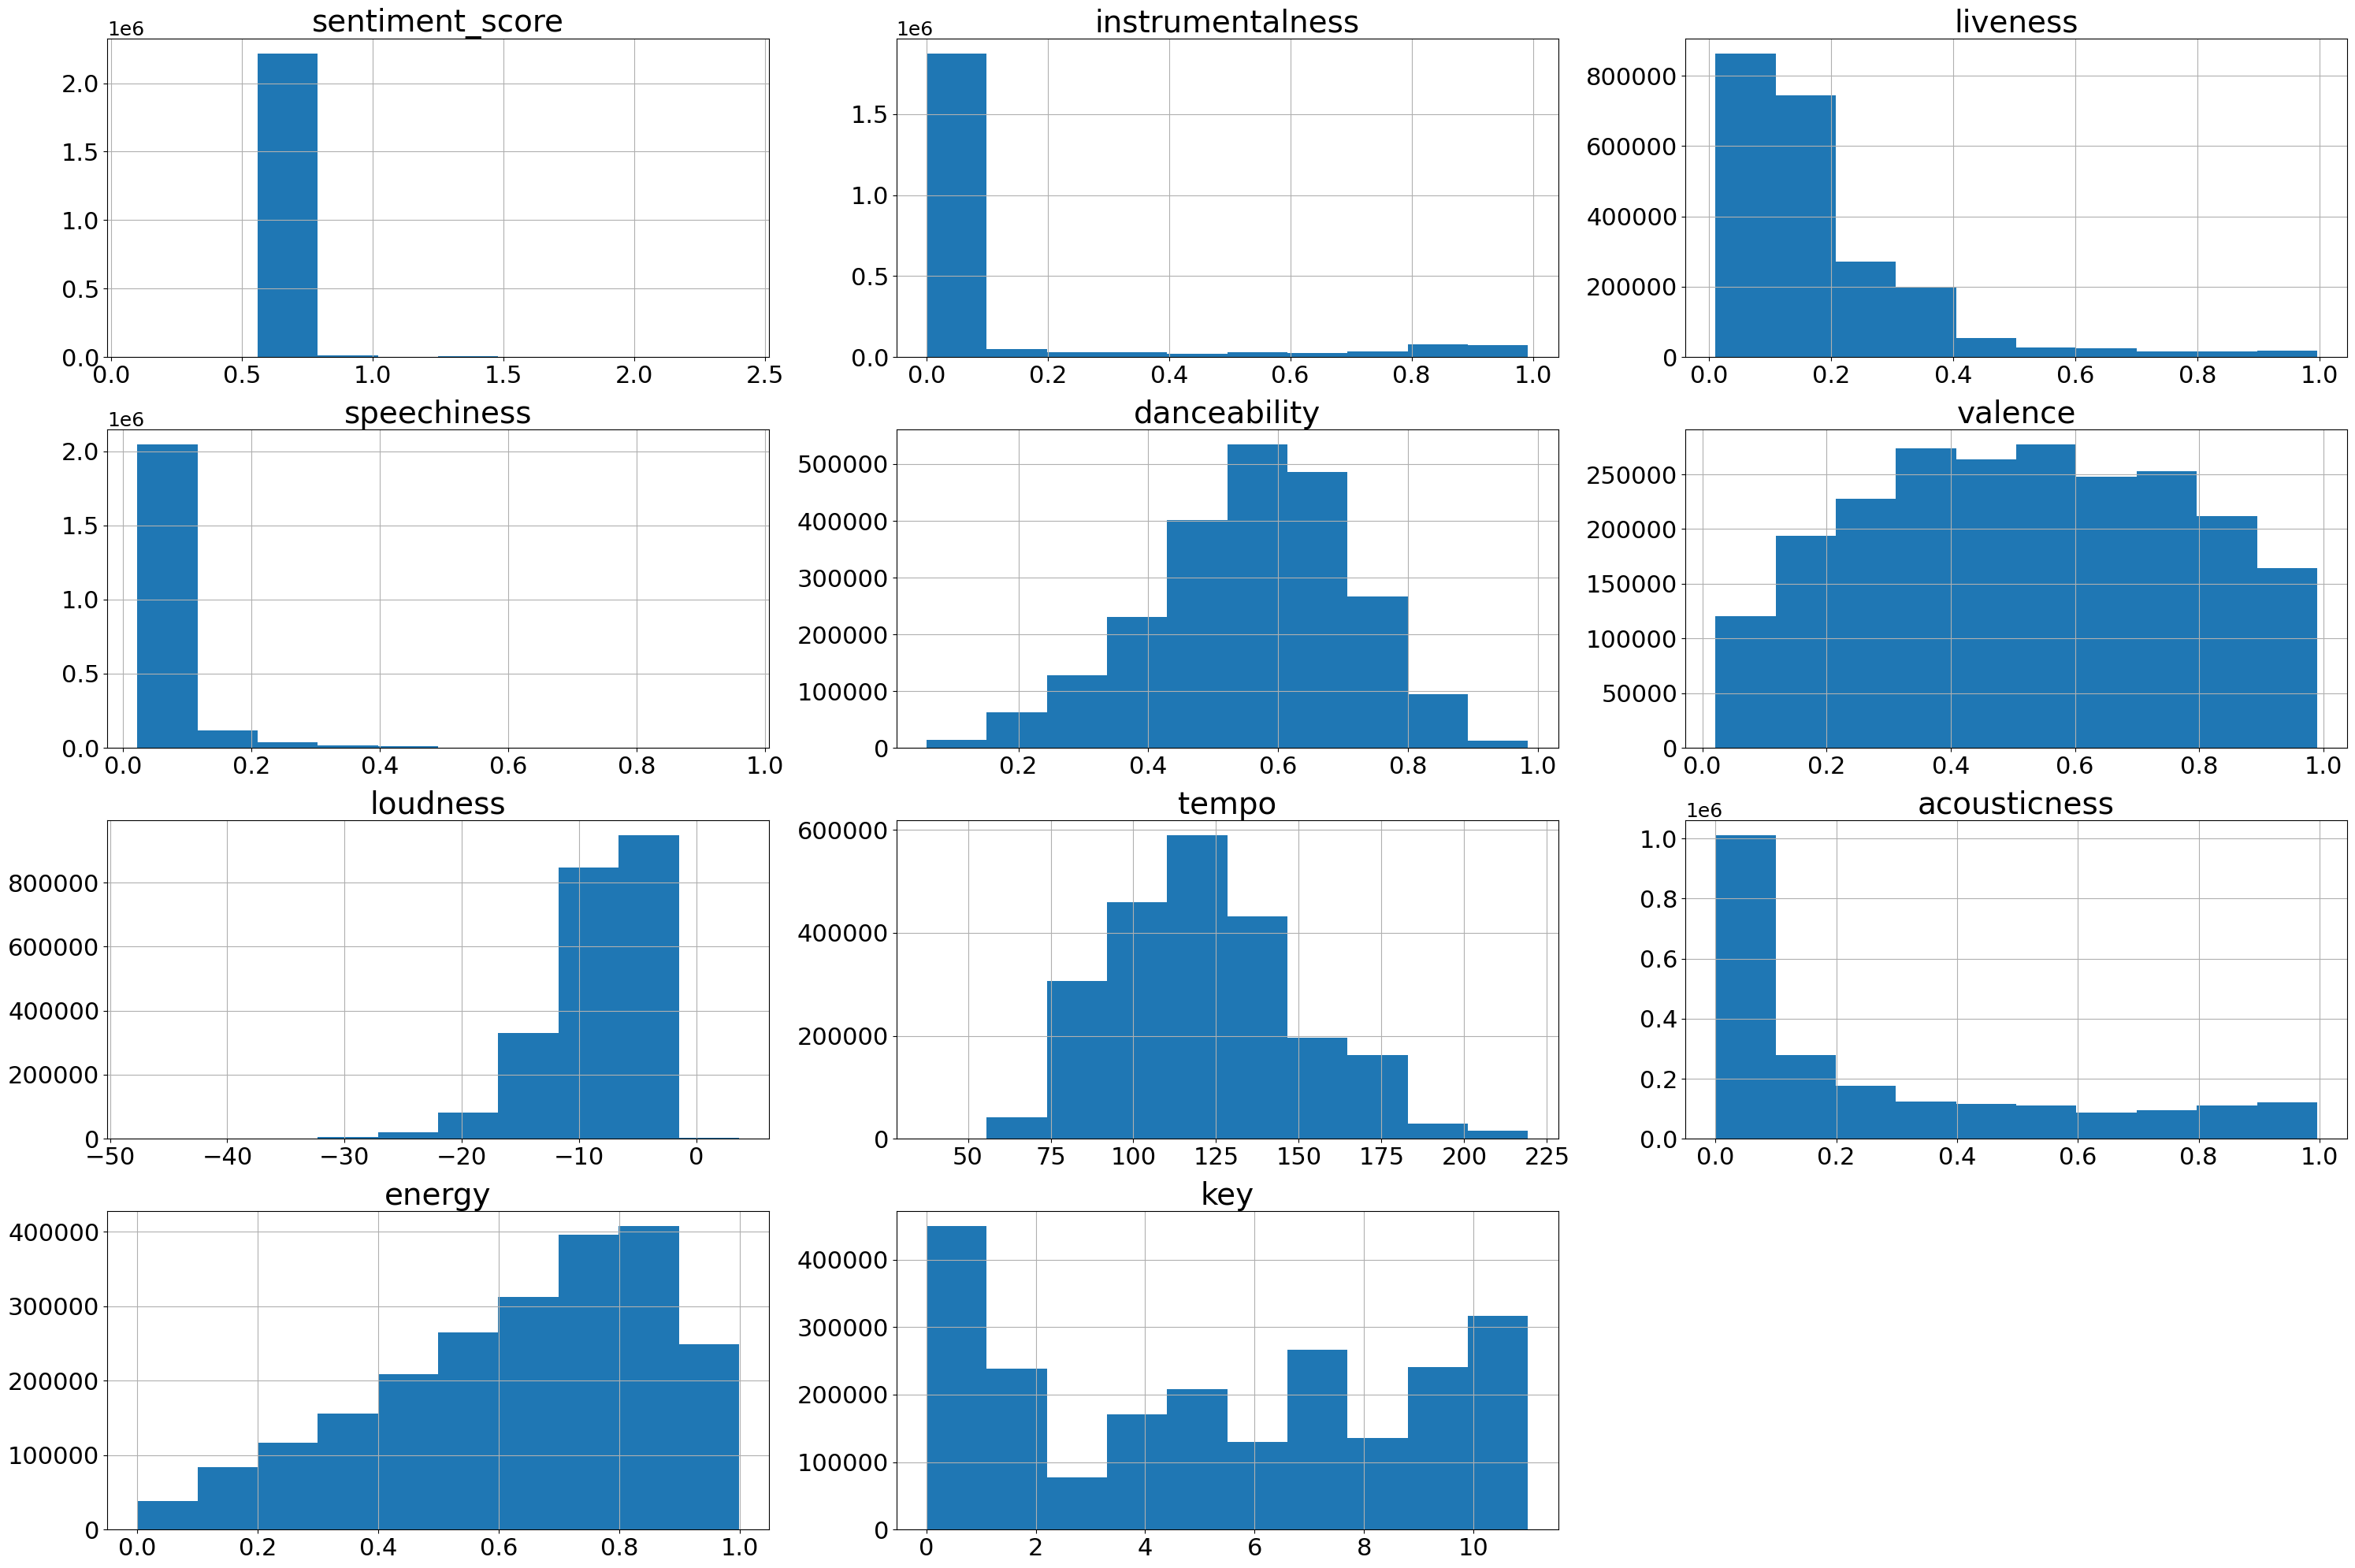

In [79]:
# Drop categorical and unnecessary features
df_mvp_lin = df_mvp.drop(['user_id', 'track_id', 'sentiment', 'mode', 'tz_Alaska_Time', 'tz_Central_Time', 'tz_Eastern_Time',
                          'tz_Hawaii_Time', 'tz_Mountain_Time', 'tz_Pacific_Time'], axis=1)


# Generate the histogram
fig = df_mvp_lin.hist(figsize=[30, 20])

# Iterate over each axis object to set the font sizes
for ax in fig.flatten():
    ax.title.set_size(28)  # Set the title font size
    ax.tick_params(axis='x', labelsize=22)  # Set x-tick font size
    ax.tick_params(axis='y', labelsize=22)  # Set y-tick font size
    ax.yaxis.get_offset_text().set_fontsize(18)  # Set font size for y-axis label


    
plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()


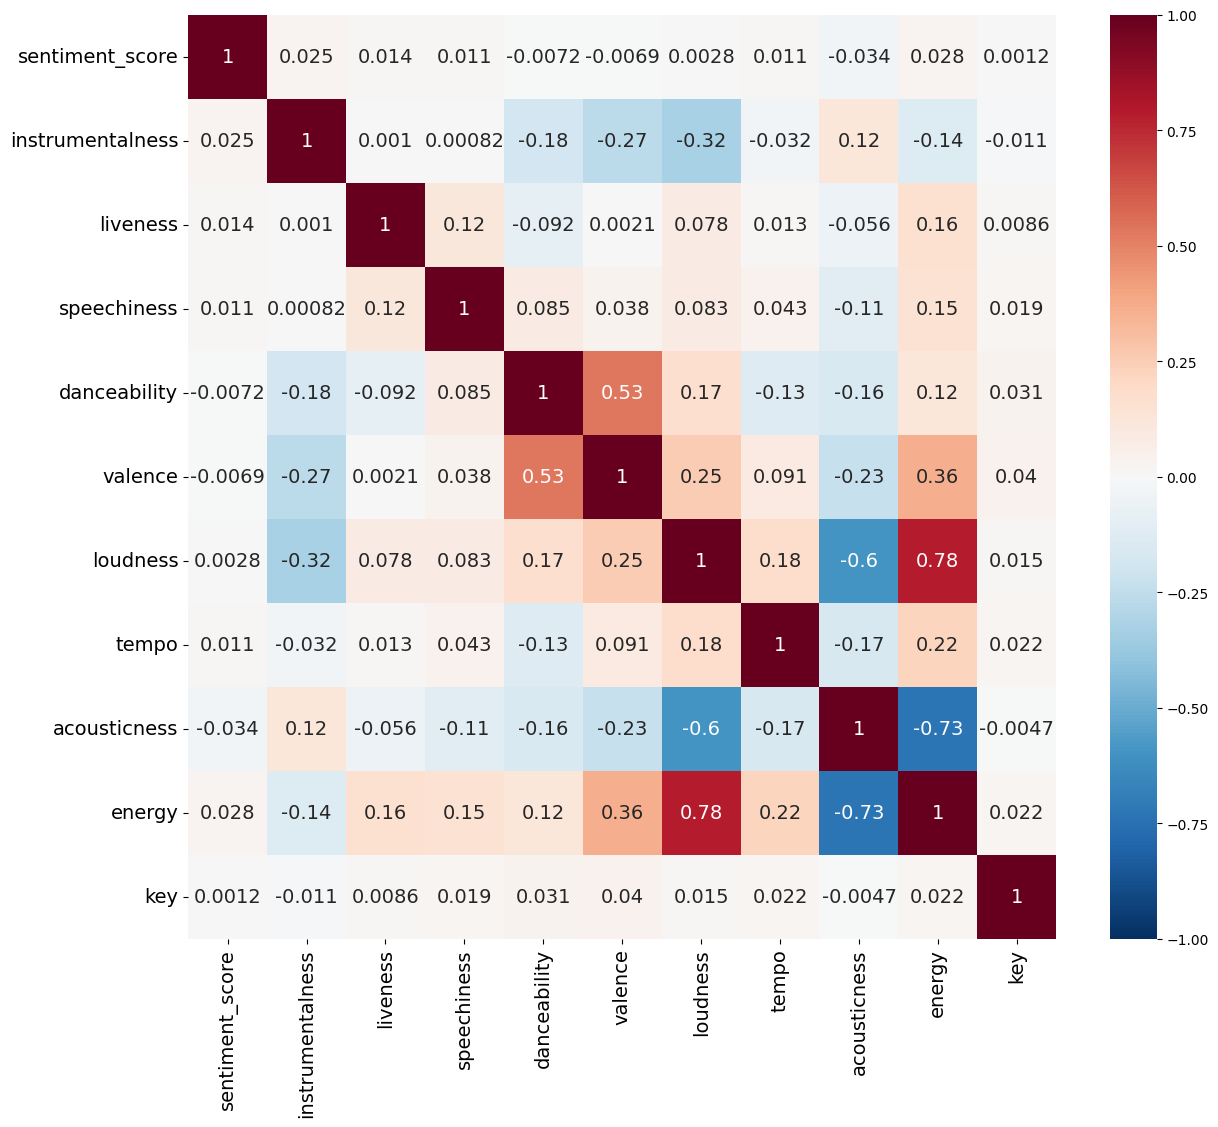

In [56]:
# Compute correlation matrix
correlation = df_mvp_lin.corr()

# Plot heatmap
plt.figure(figsize=(14, 12))
heatmap = sns.heatmap(correlation, annot=True, linewidths=0, vmin=-1, cmap="RdBu_r", 
                      annot_kws={"size": 14})  # Increase font size of annotation numbers

# Increase font size of tick labels
heatmap.tick_params(axis='both', which='major', labelsize=14)

plt.show()

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Define features and target variable
X = df_mvp_1.drop(columns=['sentiment', 'sentiment_score', 'user_id', 'track_id'])
y = df_mvp_1['sentiment']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train a logistic regression model
model = LogisticRegression(random_state=42)
model.fit(X_train_scaled, y_train)

# Predict on the test set
y_pred_log_reg = model.predict(X_test_scaled)


# Evaluate the model
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_log_reg))
print("Logistic Regression Classification Report:\n", classification_report(y_test, y_pred_log_reg))
print("Logistic Regression Confusion Matrix:\n", confusion_matrix(y_test, y_pred_log_reg))

Logistic Regression Accuracy: 0.9968004339590606
Logistic Regression Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00      1451
           1       1.00      1.00      1.00    452048

    accuracy                           1.00    453499
   macro avg       0.50      0.50      0.50    453499
weighted avg       0.99      1.00      1.00    453499

Logistic Regression Confusion Matrix:
 [[     0   1451]
 [     0 452048]]


In [5]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE
import xgboost as xgb


# Separate features and target
X = df_mvp_1.drop(['sentiment', 'sentiment_score', 'user_id', 'track_id'], axis=1)
y = df_mvp_1['sentiment']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Balance the training data using SMOTE
smote = SMOTE(random_state=42)
X_train, y_train = smote.fit_resample(X_train, y_train)

# Normalize the numerical features
scaler = StandardScaler()
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), columns=list(X.columns))
X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns=list(X.columns))

# List of models to train
models = {
    "Logistic Regression": LogisticRegression(random_state=42),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(n_jobs=-1, random_state=42),
    "XGBoost": xgb.XGBClassifier(random_state=42),
}

# Train and evaluate each model
for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    print(f"{name} Accuracy: {accuracy_score(y_test, y_pred):.4f}")
    print(f"{name} Classification Report:\n{classification_report(y_test, y_pred)}")
    print(f"{name} Confusion Matrix:\n{confusion_matrix(y_test, y_pred)}\n")


Logistic Regression Accuracy: 0.7730
Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.01      0.77      0.02      1451
           1       1.00      0.77      0.87    452048

    accuracy                           0.77    453499
   macro avg       0.50      0.77      0.45    453499
weighted avg       1.00      0.77      0.87    453499

Logistic Regression Confusion Matrix:
[[  1119    332]
 [102593 349455]]

Decision Tree Accuracy: 0.9922
Decision Tree Classification Report:
              precision    recall  f1-score   support

           0       0.28      0.94      0.43      1451
           1       1.00      0.99      1.00    452048

    accuracy                           0.99    453499
   macro avg       0.64      0.97      0.72    453499
weighted avg       1.00      0.99      0.99    453499

Decision Tree Confusion Matrix:
[[  1368     83]
 [  3472 448576]]

Random Forest Accuracy: 0.9924
Random Forest Classificat

Observations:

High Accuracy and Precision: The model shows very high accuracy and precision. However, the recall is perfect, indicating that it successfully identifies all the positive cases but misses all negative cases.

Imbalanced Data: The model fails to identify any negative sentiment, which suggests that the data might be highly imbalanced towards positive sentiment.

Address Class Imbalance: we use techniques like oversampling the minority class, undersampling the majority class, or using class weights in the model.
Model Tuning and Improvement: Try different algorithms such as Random Forest, Gradient Boosting, or Neural Networks to improve the performance.

Let's address the class imbalance and try a more sophisticated model like Random Forest.

The model now correctly identifies some negative sentiment cases, with a noticeable improvement in recall and a more balanced performance across all metrics.

The model still performs very well in terms of accuracy and precision.

Fitting 3 folds for each of 50 candidates, totalling 150 fits
Best model: RandomForestClassifier(max_depth=30, max_features='log2', min_samples_leaf=2,
                       n_estimators=200, random_state=42)
Best Parameters: {'n_estimators': 200, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_features': 'log2', 'max_depth': 30}
Training Accuracy: 99.8686
Test Accuracy: 99.4498
Classification Report:
               precision    recall  f1-score   support

           0       0.24      0.32      0.27      1451
           1       1.00      1.00      1.00    452048

    accuracy                           0.99    453499
   macro avg       0.62      0.66      0.64    453499
weighted avg       1.00      0.99      0.99    453499

Confusion Matrix:
 [[   470    981]
 [  1514 450534]]


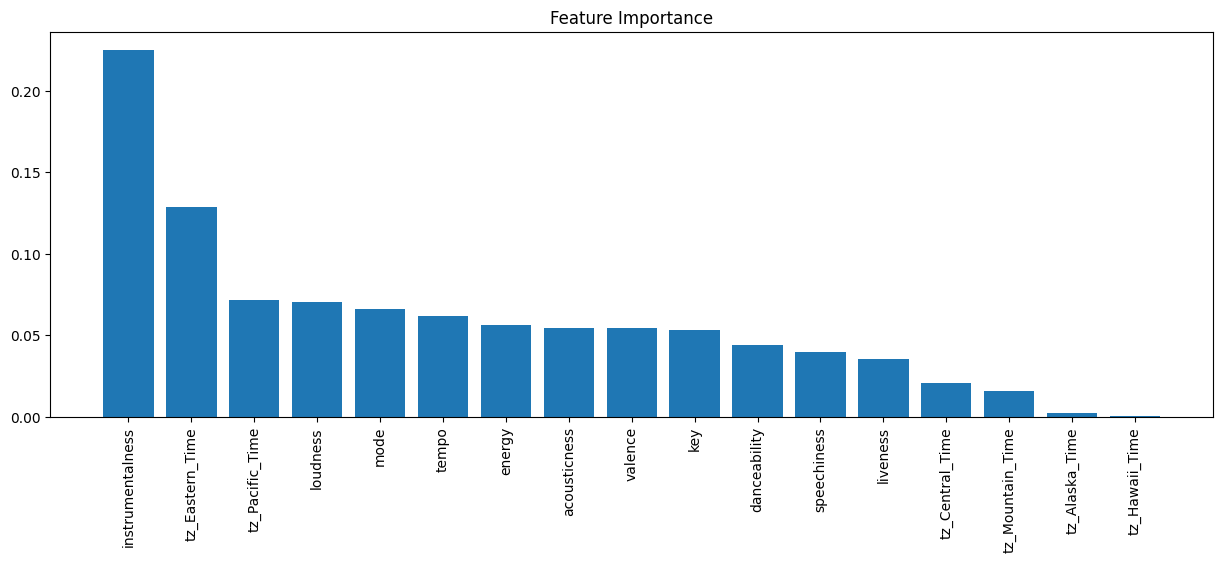

In [18]:
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE
import numpy as np
import pandas as pd


# Separate features and target
X = df_mvp_1.drop(['sentiment', 'sentiment_score', 'user_id', 'track_id'], axis=1)
y = df_mvp_1['sentiment']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Sample a smaller subset of the training data
sample_size = 0.02  # Use 2% of the data
X_train, _, y_train, _ = train_test_split(X_train, y_train, test_size=1-sample_size, random_state=42)

# Balance the training data using SMOTE
smote = SMOTE(random_state=42)
X_train, y_train = smote.fit_resample(X_train, y_train)

# Normalize the numerical features
scaler = StandardScaler()
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), columns=list(X.columns))
X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns=list(X.columns))

# Define parameter grid
param_grid_rf = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2']
}

# Initialize the Random Forest classifier
clf_rf = RandomForestClassifier(random_state=42)

# Perform Randomized Search CV
random_search_rf = RandomizedSearchCV(estimator=clf_rf, param_distributions=param_grid_rf, n_iter=50, cv=3, n_jobs=-1, verbose=2, scoring='accuracy', random_state=42)
random_search_rf.fit(X_train_scaled, y_train)

# Get the best parameters and model
best_params_rf = random_search_rf.best_params_
best_rf_model = random_search_rf.best_estimator_

# Predict on the test set with the best model
y_pred_best_rf_test = best_rf_model.predict(X_test_scaled)

# Predict on the train set with the best model
y_pred_best_rf_train = best_rf_model.predict(X_train_scaled)

print(f'Best model: {best_rf_model}')
print(f'Best Parameters: {best_params_rf}')

# Evaluate the best model
train_acc = accuracy_score(y_train, y_pred_best_rf_train)
test_acc = accuracy_score(y_test, y_pred_best_rf_test)
print(f'Training Accuracy: {100*train_acc:.4f}')
print(f'Test Accuracy: {100*test_acc:.4f}')

# Detailed evaluation
print("Classification Report:\n", classification_report(y_test, y_pred_best_rf_test))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_best_rf_test))


# Feature importance analysis
importances = best_rf_model.feature_importances_
indices = np.argsort(importances)[::-1]
feature_names = X_train.columns

plt.figure(figsize=(15, 5))
plt.title("Feature Importance")
plt.bar(range(X_train.shape[1]), importances[indices], align='center')
plt.xticks(range(X_train.shape[1]), feature_names[indices], rotation=90)
plt.show()

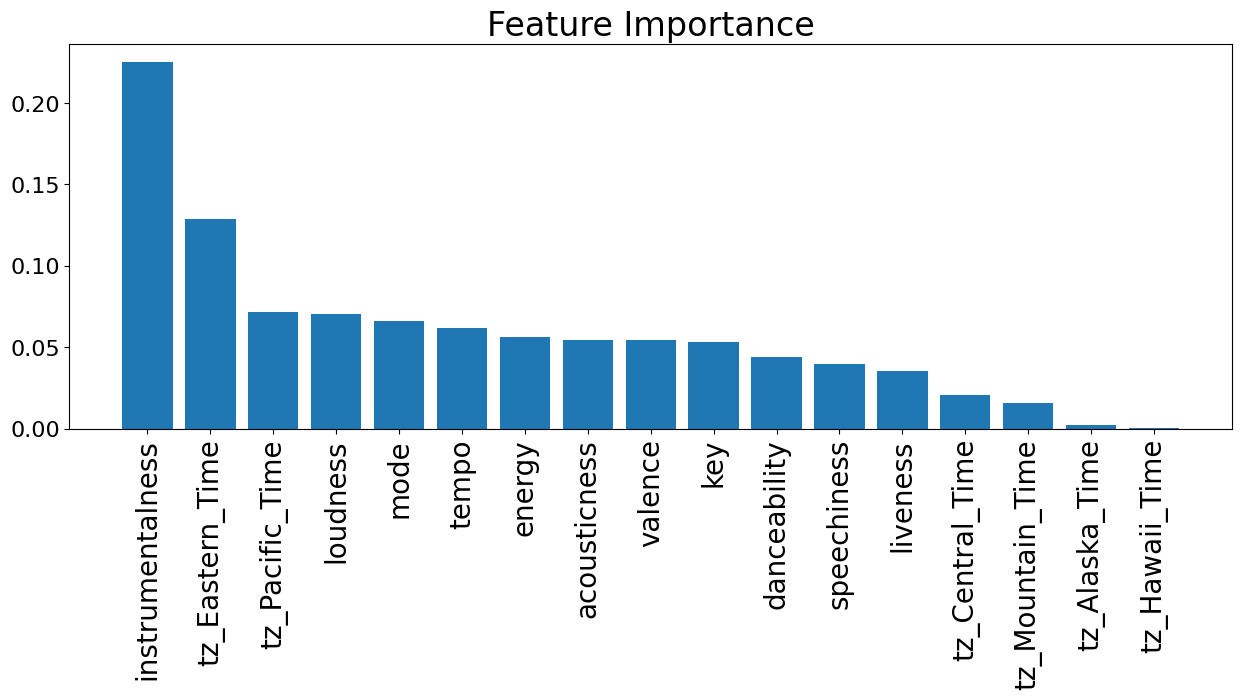

In [21]:

# Assuming best_rf_model and X_train are already defined
importances = best_rf_model.feature_importances_
indices = np.argsort(importances)[::-1]
feature_names = X_train.columns

plt.figure(figsize=(15, 5))
plt.title("Feature Importance", fontsize=24)  # Set the font size for the title
plt.bar(range(X_train.shape[1]), importances[indices], align='center')
plt.xticks(range(X_train.shape[1]), feature_names[indices], rotation=90, fontsize=20)  # Set the font size for x-ticks
plt.yticks(fontsize=16)  # Set the font size for y-ticks
plt.show()


In [9]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE


# Separate features and target
X = df_mvp_1.drop(['sentiment', 'sentiment_score', 'user_id', 'track_id'], axis=1)
y = df_mvp_1['sentiment']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Sample a smaller subset of the training data
sample_size = 0.5  # Use % of the data
X_train, _, y_train, _ = train_test_split(X_train, y_train, test_size=1-sample_size, random_state=42)

# Balance the training data using SMOTE
smote = SMOTE(random_state=42)
X_train, y_train = smote.fit_resample(X_train, y_train)

# Normalize the numerical features
scaler = StandardScaler()
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), columns=list(X.columns))
X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns=list(X.columns))

# Initialize and train the random forest model
best_params = {'n_estimators': 200, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_features': 'log2', 'max_depth': 30}
rf_clf_best = RandomForestClassifier(**best_params, random_state=42, n_jobs=-1)
rf_clf_best.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred_rf = rf_clf_best.predict(X_test_scaled)

# Evaluate the model
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Random Forest Classification Report:\n", classification_report(y_test, y_pred_rf))
print("Random Forest Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))

Random Forest Accuracy: 0.9933142079695876
Random Forest Classification Report:
               precision    recall  f1-score   support

           0       0.31      0.91      0.47      1451
           1       1.00      0.99      1.00    452048

    accuracy                           0.99    453499
   macro avg       0.66      0.95      0.73    453499
weighted avg       1.00      0.99      0.99    453499

Random Forest Confusion Matrix:
 [[  1325    126]
 [  2906 449142]]


In [20]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE


# Separate features and target
X = df_mvp_1.drop(['sentiment', 'sentiment_score', 'user_id', 'track_id'], axis=1)
y = df_mvp_1['sentiment']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Sample a smaller subset of the training data
#sample_size = 0.5  # Use % of the data
#X_train, _, y_train, _ = train_test_split(X_train, y_train, test_size=1-sample_size, random_state=42)

# Balance the training data using SMOTE
#smote = SMOTE(random_state=42)
#X_train, y_train = smote.fit_resample(X_train, y_train)

# Normalize the numerical features
scaler = StandardScaler()
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), columns=list(X.columns))
X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns=list(X.columns))

# Calculate class weights
class_weights = {0: 10, 1: 1}  # Adjust these weights as needed

# Initialize the RandomForest model with best parameters and class weights
best_params = {'n_estimators': 200, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_features': 'log2', 'max_depth': 30}
rf_clf_best = RandomForestClassifier(**best_params, random_state=42, class_weight=class_weights, n_jobs=-1)

rf_clf_best.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred_rf = rf_clf_best.predict(X_test_scaled)

# Evaluate the model
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Random Forest Classification Report:\n", classification_report(y_test, y_pred_rf))
print("Random Forest Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))


Random Forest Accuracy: 0.9941984436569871
Random Forest Classification Report:
               precision    recall  f1-score   support

           0       0.35      0.92      0.50      1451
           1       1.00      0.99      1.00    452048

    accuracy                           0.99    453499
   macro avg       0.67      0.96      0.75    453499
weighted avg       1.00      0.99      1.00    453499

Random Forest Confusion Matrix:
 [[  1330    121]
 [  2510 449538]]


In [17]:
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import pandas as pd

# Step 1: Remove low-impact features
# Assuming feature_importances_ contains the importance scores from the RandomForest model
# Features are ordered based on their importance
low_impact_features = ['tz_Hawaii_Time', 'tz_Alaska_Time', 'tz_Mountain_Time']  # low-impact features

# Separate features and target
X = df_mvp_1.drop(['sentiment', 'sentiment_score', 'user_id', 'track_id'] + low_impact_features, axis=1)
y = df_mvp_1['sentiment']

# Step 2: Creating Interaction Terms
# Create interaction terms based on feature importance insights
X['instrumentalness_loudness'] = X['instrumentalness'] * X['loudness']

# Step 3: Polynomial Features
# Generate polynomial features for instrumentalness and loudness
features_to_poly = X[['instrumentalness', 'loudness']]
poly = PolynomialFeatures(degree=2, include_bias=False)
features_poly = poly.fit_transform(features_to_poly)

# Convert polynomial features back to DataFrame and concatenate with original DataFrame
features_poly_df = pd.DataFrame(features_poly, columns=poly.get_feature_names_out(['instrumentalness', 'loudness']))
X = pd.concat([X.drop(['instrumentalness', 'loudness'], axis=1), features_poly_df], axis=1)

# Step 4: Feature Scaling
# Initialize and apply a scaler
scaler = StandardScaler()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Class weights
class_weights = {0: 10, 1: 1}

# Random Forest with best parameters and class weights
best_params = {
    'n_estimators': 200, 'min_samples_split': 2, 'min_samples_leaf': 2,
    'max_features': 'log2', 'max_depth': 30
}
rf_clf_best = RandomForestClassifier(**best_params, class_weight=class_weights, random_state=42, n_jobs=-1)
rf_clf_best.fit(X_train_scaled, y_train)

# Make predictions and evaluate the model
y_pred_rf = rf_clf_best.predict(X_test_scaled)
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Random Forest Classification Report:\n", classification_report(y_test, y_pred_rf))
print("Random Forest Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))






Random Forest Accuracy: 0.9942028538100415
Random Forest Classification Report:
               precision    recall  f1-score   support

           0       0.35      0.91      0.50      1451
           1       1.00      0.99      1.00    452048

    accuracy                           0.99    453499
   macro avg       0.67      0.95      0.75    453499
weighted avg       1.00      0.99      1.00    453499

Random Forest Confusion Matrix:
 [[  1327    124]
 [  2505 449543]]


Unique classes in y_train_resampled: [0 1]
Counts of each class in y_train_resampled: [1808342 1808342]
Epoch 1/20
90418/90418 ━━━━━━━━━━━━━━━━━━━━ 430s 5ms/step - accuracy: 0.8990 - loss: 0.2611 - val_accuracy: 0.9581 - val_loss: 0.1656
Epoch 2/20
90418/90418 ━━━━━━━━━━━━━━━━━━━━ 284s 3ms/step - accuracy: 0.9393 - loss: 0.1847 - val_accuracy: 0.9575 - val_loss: 0.1471
Epoch 3/20
90418/90418 ━━━━━━━━━━━━━━━━━━━━ 534s 6ms/step - accuracy: 0.9447 - loss: 0.1735 - val_accuracy: 0.9590 - val_loss: 0.1551
Epoch 4/20
90418/90418 ━━━━━━━━━━━━━━━━━━━━ 708s 8ms/step - accuracy: 0.9475 - loss: 0.1674 - val_accuracy: 0.9584 - val_loss: 0.1371
Epoch 5/20
90418/90418 ━━━━━━━━━━━━━━━━━━━━ 320s 4ms/step - accuracy: 0.9495 - loss: 0.1628 - val_accuracy: 0.9581 - val_loss: 0.1389
Epoch 6/20
90418/90418 ━━━━━━━━━━━━━━━━━━━━ 292s 3ms/step - accuracy: 0.9504 - loss: 0.1602 - val_accuracy: 0.9580 - val_loss: 0.1284
Epoch 7/20
90418/90418 ━━━━━━━━━━━━━━━━━━━━ 290s 3ms/step - accuracy: 0.9514 - loss: 0.1582 

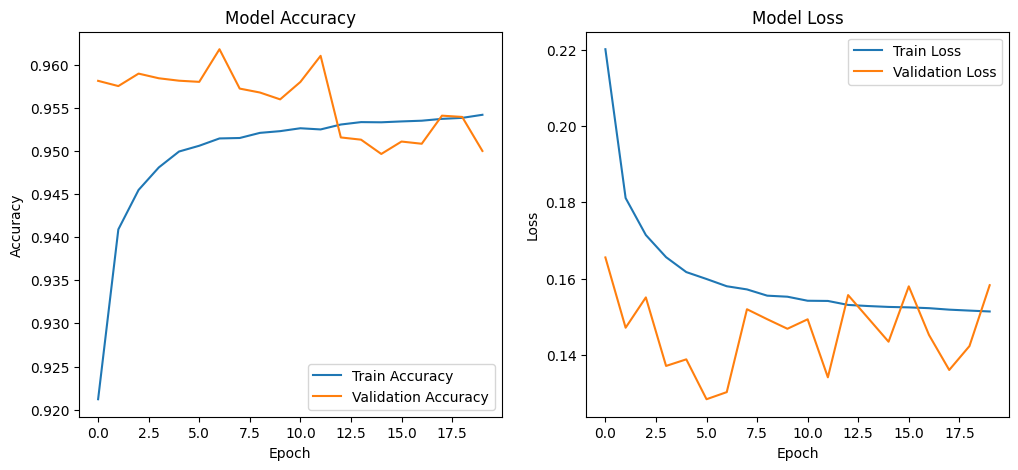

In [16]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.utils.class_weight import compute_class_weight
from imblearn.over_sampling import SMOTE
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
import numpy as np

# Assuming df_mvp_1 is your preloaded DataFrame and it's been preprocessed already
low_impact_features = ['tz_Hawaii_Time', 'tz_Alaska_Time', 'tz_Mountain_Time']  # Low-impact features

# Separate features and target
X = df_mvp_1.drop(['sentiment', 'sentiment_score', 'user_id', 'track_id'] + low_impact_features, axis=1)
y = df_mvp_1['sentiment']

# Creating Interaction Terms based on feature importance insights
X['instrumentalness_loudness'] = X['instrumentalness'] * X['loudness']

# Generate polynomial features for 'instrumentalness' and 'loudness'
features_to_poly = X[['instrumentalness', 'loudness']]
poly = PolynomialFeatures(degree=2, include_bias=False)
features_poly = poly.fit_transform(features_to_poly)

# Convert polynomial features back to DataFrame and concatenate with original DataFrame
features_poly_df = pd.DataFrame(features_poly, columns=poly.get_feature_names_out(['instrumentalness', 'loudness']))
X = pd.concat([X.drop(['instrumentalness', 'loudness'], axis=1), features_poly_df], axis=1)

# Feature Scaling
scaler = StandardScaler()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Apply SMOTE to balance the dataset
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_scaled, y_train)

# Print unique values in y_train_resampled to verify SMOTE
unique_classes_resampled, counts_classes_resampled = np.unique(y_train_resampled, return_counts=True)
print(f"Unique classes in y_train_resampled: {unique_classes_resampled}")
print(f"Counts of each class in y_train_resampled: {counts_classes_resampled}")

# Define the model architecture
def build_model(input_dim):
    model = Sequential([
        Dense(128, activation='relu', input_dim=input_dim),
        Dropout(0.5),
        Dense(64, activation='relu'),
        Dropout(0.5),
        Dense(32, activation='relu'),
        Dropout(0.5),
        Dense(1, activation='sigmoid')  # Using sigmoid for binary classification
    ])
    return model

# Compile the model
model = build_model(X_train_resampled.shape[1])
model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

# Model Training without class weights (SMOTE has already balanced the classes)
history = model.fit(
    X_train_resampled, y_train_resampled,
    epochs=20,
    batch_size=32,
    validation_split=0.2,  # Using 20% of the data for validation
    verbose=1
)

# Model Evaluation
test_loss, test_acc = model.evaluate(X_test_scaled, y_test, verbose=2)
y_pred = (model.predict(X_test_scaled) > 0.5).astype("int32")  # Threshold predictions for binary classification
print('\nTest accuracy:', test_acc)

# Print classification report and confusion matrix
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

# Plotting training history
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()

